<a href="https://colab.research.google.com/github/filipesartori/Visao-Computacional/blob/main/Reconhecimento_Facil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenCV

## Carregameneto da base de dados


In [1]:
from PIL import Image 
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
path = '/content/drive/MyDrive/Cursos/Datasets/yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

## Pré-processamento das imagens

In [3]:
import os
print(os.listdir('/content/yalefaces/train'))

['subject10.normal.gif', 'subject01.glasses.gif', 'subject03.happy.gif', 'subject15.wink.gif', 'subject02.sad.gif', 'subject03.wink.gif', 'subject09.noglasses.gif', 'subject14.noglasses.gif', 'subject04.noglasses.gif', 'subject06.glasses.gif', 'subject01.normal.gif', 'subject03.sad.gif', 'subject04.rightlight.gif', 'subject14.rightlight.gif', 'subject02.sleepy.gif', 'subject11.noglasses.gif', 'subject05.centerlight.gif', 'subject02.noglasses.gif', 'subject13.surprised.gif', 'subject14.glasses.gif', 'subject08.sleepy.gif', 'subject06.noglasses.gif', 'subject13.glasses.gif', 'subject12.sleepy.gif', 'subject05.glasses.gif', 'subject12.noglasses.gif', 'subject13.rightlight.gif', 'subject15.happy.gif', 'subject01.leftlight.gif', 'subject07.wink.gif', 'subject12.wink.gif', 'subject08.sad.gif', 'subject09.surprised.gif', 'subject03.rightlight.gif', 'subject09.wink.gif', 'subject04.sad.gif', 'subject01.sleepy.gif', 'subject03.surprised.gif', 'subject09.sleepy.gif', 'subject01.noglasses.gif', '

In [ ]:
def get_image_data():
  paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
  faces = []
  ids = []
  for path in paths:
    imagem = Image.open(path).convert('L')
    imagem_np = np.array(imagem, 'uint8')
    id = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
    #print(id)
    ids.append(id)
    faces.append(imagem_np)
    
  return np.array(ids), faces  


In [ ]:
ids, faces = get_image_data()

In [ ]:
ids

## Treinamento do classificador LBPH

In [ ]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create(radius=4, neighbors=14, grid_x=9, grid_y=9)
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

## Reconhecimento de faces

In [ ]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier.yml')

In [ ]:
imagem_teste = '/content/yalefaces/test/subject07.happy.gif'

In [ ]:
imagem = Image.open(imagem_teste).convert('L')
imagem_np = np.array(imagem, 'uint8')
imagem_np

In [ ]:
previsão = lbph_face_classifier.predict(imagem_np)
previsão

In [ ]:
saida_esperada = int(os.path.split(imagem_teste)[1].split('.')[0].replace('subject', ''))
saida_esperada

In [ ]:
cv2.putText(imagem_np, 'Pred: ' +  str(previsão[0]), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2.putText(imagem_np, 'Exp: ' +  str(saida_esperada), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2_imshow(imagem_np)

## Avaliação do classificador

In [ ]:
paths = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
previsoes = []
saidas_esperadas = []
for path in paths:
  imagem = Image.open(path).convert('L')
  imagem_np = np.array(imagem, 'uint8')
  previsão, _ = lbph_face_classifier.predict(imagem_np)
  saida_esperada = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))

  previsoes.append(previsão)
  saidas_esperadas.append(saida_esperada)

In [ ]:
previsoes = np.array(previsoes)
saidas_esperadas = np.array(saidas_esperadas)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(saidas_esperadas, previsoes)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(saidas_esperadas, previsoes)
cm

In [ ]:
import seaborn
seaborn.heatmap(cm, annot=True);

In [ ]:
cv2.putText(imagem_np, 'Pred: ' +  str(previsoes[0]), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2.putText(imagem_np, 'Exp: ' +  str(saidas_esperadas), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2_imshow(imagem_np)

# Dlib

In [5]:
import dlib

## Detecção de pontos faciais

In [6]:
detector_face = dlib.get_frontal_face_detector()
detector_pontos = dlib.shape_predictor('/content/drive/MyDrive/Cursos/Weights/shape_predictor_68_face_landmarks.dat')

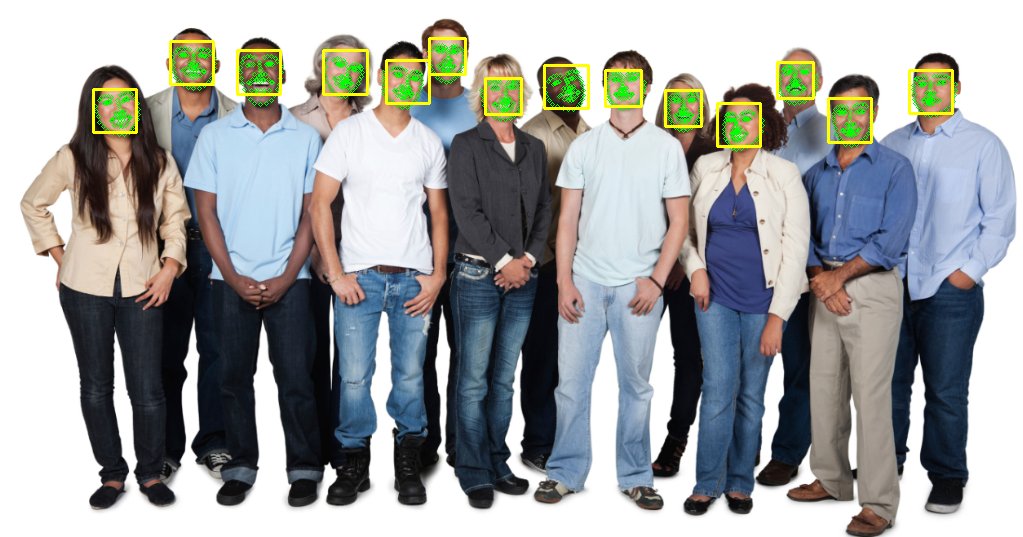

In [7]:
imagem = cv2.imread('/content/drive/MyDrive/Cursos/Images/people2.jpg')
deteccoes = detector_face(imagem, 1)
for face in deteccoes:
  pontos = detector_pontos(imagem, face)
  for ponto in pontos.parts():
    cv2.circle(imagem, (ponto.x, ponto.y), 2, (0,255,0), 1)


  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(imagem, (l, t), (r, b), (0, 255, 255), 2)
cv2_imshow(imagem)  

## Detecção de descritores faciais

In [8]:
detector_face = dlib.get_frontal_face_detector()
detector_pontos = dlib.shape_predictor('/content/drive/MyDrive/Cursos/Weights/shape_predictor_68_face_landmarks.dat')
descritor_facial_extrator = dlib.face_recognition_model_v1('/content/drive/MyDrive/Cursos/Weights/dlib_face_recognition_resnet_model_v1.dat')

In [9]:
from posix import listdir
index = {}
idx = 0
descritores_faciais = None

paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
for path in paths:
  imagem = Image.open(path).convert('RGB')
  imagem_np = np.array(imagem, 'uint8')
  deteccoes = detector_face(imagem_np, 1)
  for face in deteccoes:
    l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(imagem_np, (l,t), (r,b), (0,255,255), 2)

    pontos = detector_pontos(imagem_np, face)
    for ponto in pontos.parts():
      cv2.circle(imagem_np, (ponto.x, ponto.y), 2, (0,0,255), 1)

    descritor_facial = descritor_facial_extrator.compute_face_descriptor(imagem_np, pontos)
    descritor_facial = [f for f in descritor_facial]
    descritor_facial = np.asarray(descritor_facial, dtype=np.float64)
    descritor_facial = descritor_facial[np.newaxis, :]

    if descritores_faciais is None:
      descritores_faciais = descritor_facial
    else:
      descritores_faciais = np.concatenate((descritores_faciais, descritor_facial), axis = 0)  

    index[idx] = path
    idx += 1 
  #cv2_imshow(imagem_np)  

## Cálculo da distância entre as faces

In [10]:
np.linalg.norm(descritores_faciais[131] - descritores_faciais[130]) #Quanto maior o valor, maior a diferença entre as faces

0.8352750488584356

In [11]:
np.linalg.norm(descritores_faciais[0] - descritores_faciais, axis = 1)

array([0.        , 0.82443241, 0.67738558, 0.68898428, 0.75321272,
       0.68779632, 0.71836376, 0.73986038, 0.76415546, 0.68424643,
       0.80760206, 0.71154557, 0.72923043, 0.74428846, 0.77246362,
       0.86705331, 0.83707608, 0.79688153, 0.61926037, 0.72540073,
       0.70004333, 0.71058303, 0.68471515, 0.82059875, 0.83133281,
       0.82005915, 0.56165319, 0.68473217, 0.76133288, 0.49605356,
       0.74785836, 0.71197599, 0.70684138, 0.63564901, 0.69418605,
       0.77650178, 0.80550767, 0.71652289, 0.71272088, 0.87225674,
       0.78799888, 0.75181496, 0.60329676, 0.71392026, 0.71836376,
       0.57936102, 0.79018132, 0.86758516, 0.59277007, 0.7546027 ,
       0.76440807, 0.83484111, 0.73103419, 0.65904576, 0.79775151,
       0.76406298, 0.84555287, 0.35760412, 0.7117531 , 0.6922488 ,
       0.14397685, 0.76645445, 0.63625401, 0.519176  , 0.85540081,
       0.7143567 , 0.52593812, 0.74261119, 0.86697385, 0.68728926,
       0.72317482, 0.78845825, 0.67280939, 0.7030739 , 0.47166

In [12]:
np.argmin(np.linalg.norm(descritores_faciais[0] - descritores_faciais[1:], axis = 1))

59

## Detecção de faces com Dlib

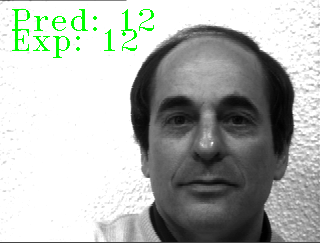

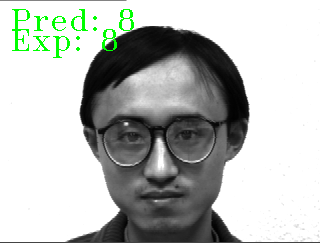

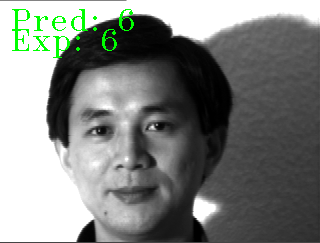

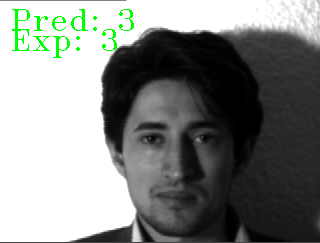

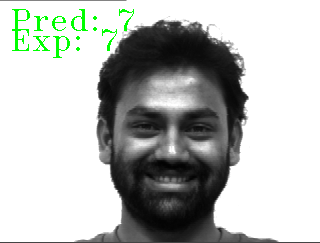

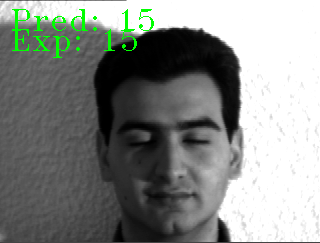

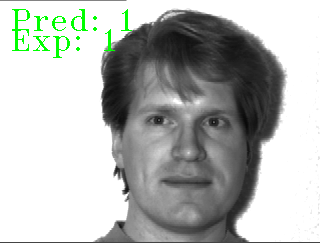

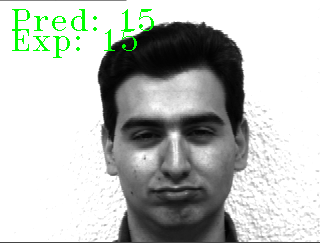

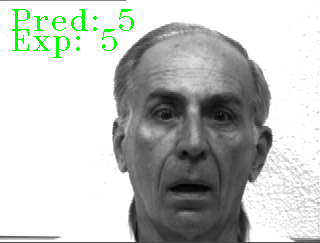

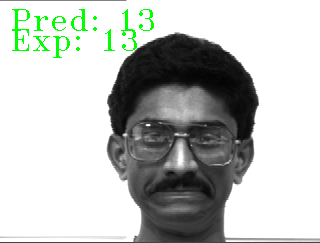

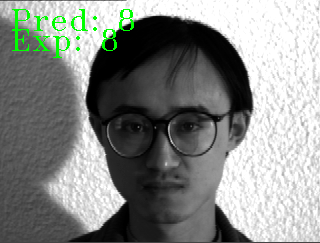

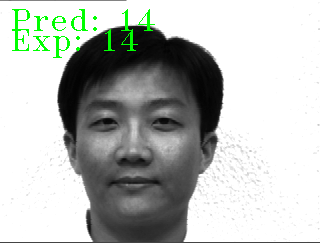

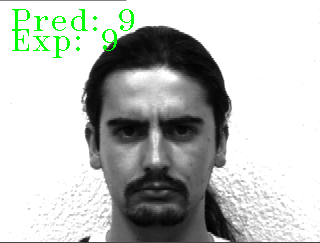

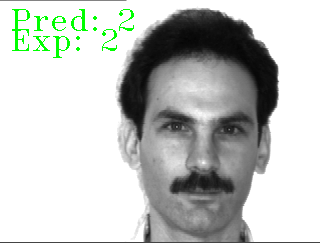

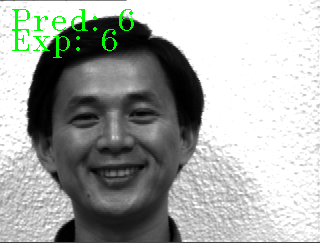

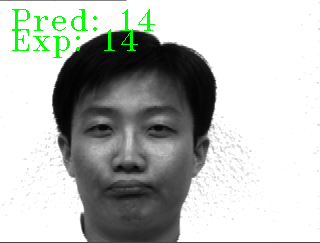

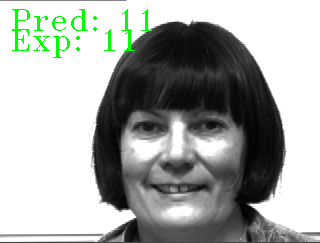

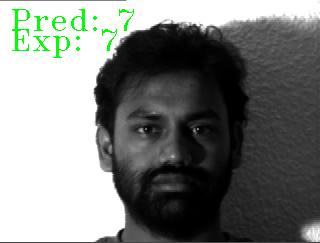

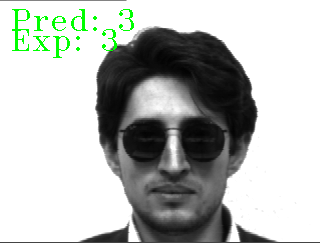

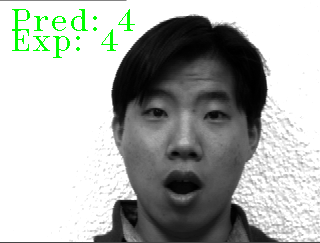

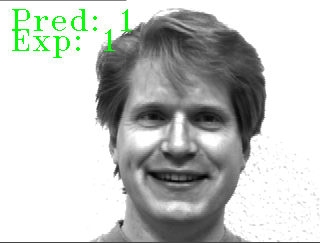

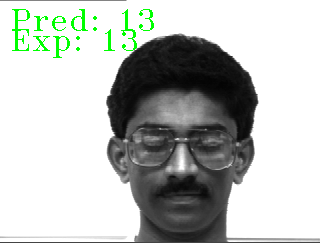

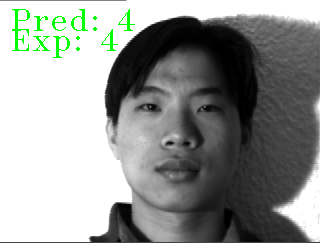

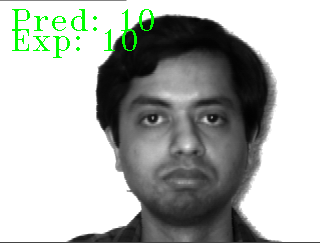

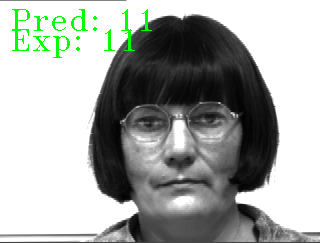

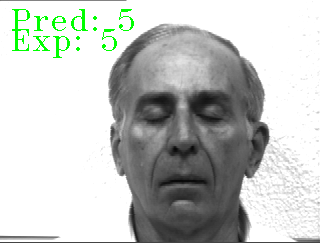

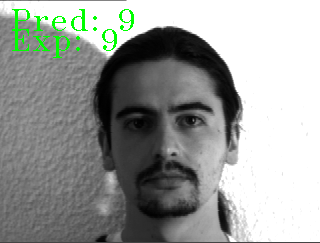

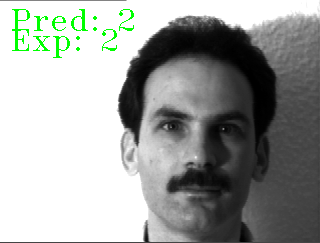

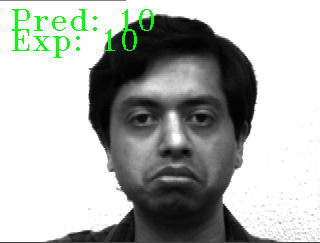

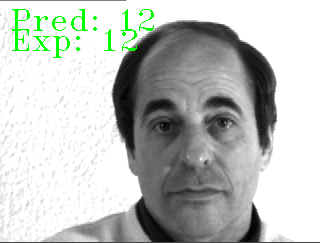

In [26]:
confianca = 0.6
previsoes = []
saidas_esperadas = []



paths = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
for path in paths:
  imagem = Image.open(path).convert('RGB')
  imagem_np = np.array(imagem, 'uint8')
  deteccoes = detector_face(imagem_np, 1)
  for face in deteccoes:
    pontos = detector_pontos(imagem_np, face)
    descritor_facial = descritor_facial_extrator.compute_face_descriptor(imagem_np, pontos)
    descritor_facial = [f for f in descritor_facial]
    descritor_facial = np.asarray(descritor_facial, dtype=np.float64)
    descritor_facial = descritor_facial[np.newaxis, :]

    distancias = np.linalg.norm(descritor_facial - descritores_faciais, axis = 1)
    indice_minimo = np.argmin(distancias)
    distancia_minima = distancias[indice_minimo]
    if distancia_minima <= confianca:
      nome_previsao = int(os.path.split(index[indice_minimo])[1].split('.')[0].replace('subject', ''))
    else:
      nome_previsao = 'Unidentified face'

    nome_real = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))

    previsoes.append(nome_previsao)
    saidas_esperadas.append(nome_real)

    cv2.putText(imagem_np, 'Pred: ' + str(nome_previsao), (10, 30), cv2.FONT_HERSHEY_TRIPLEX, 1, (0,255,0))
    cv2.putText(imagem_np, 'Exp: ' + str(nome_real), (10, 50), cv2.FONT_HERSHEY_TRIPLEX, 1, (0,255,0))

  cv2_imshow(imagem_np)

previsoes = np.array(previsoes)
saidas_esperadas = np.array(saidas_esperadas)    


In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(saidas_esperadas, previsoes) 

1.0